In [1]:
import pandas as pd
import numpy as np

In [2]:
df = np.loadtxt('data1.csv', delimiter=',')

In [3]:
df.shape

(50, 2)

In [4]:
x = df[:,0]
y = df[:,1]

In [5]:
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis =1)

In [6]:
print(f'shape of input x is : {x.shape}')
print(f'shape of output y is : {y.shape}')

shape of input x is : (50, 1)
shape of output y is : (50, 1)


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

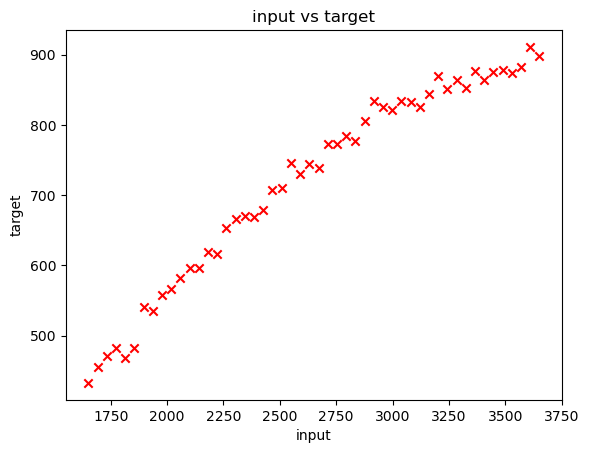

In [9]:
plt.scatter(x,y, marker='x',c='r')
plt.title('input vs target')
plt.xlabel('input')
plt.ylabel('target')
plt.show()

In [11]:
# importing lib. for building linear regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [25]:
# get 60% data in train set and remaining 40 into cv and test
x_train, x_tem, y_train, y_tmp = train_test_split(x,y, test_size=0.4, random_state=1)

# split 40% rmn data into one half for cv and another for test
x_cv, x_test, y_cv, y_test = train_test_split(x_tem, y_tmp, test_size=0.5, random_state=1)

del x_tem, y_tmp

print(f'shape of training set (i/p) : {x_train.shape}')
print(f'shape of training set (target) : {y_train.shape}')
print(f'shape of cv set (i/p) : {x_cv.shape}')
print(f'shape of cv (target) : {y_cv.shape}')
print(f'shape of test set (i/p) : {x_test.shape}')
print(f'shape of test set (taarget) : {y_test.shape}')

shape of training set (i/p) : (30, 1)
shape of training set (target) : (30, 1)
shape of cv set (i/p) : (10, 1)
shape of cv (target) : (10, 1)
shape of test set (i/p) : (10, 1)
shape of test set (taarget) : (10, 1)


In [27]:
# scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

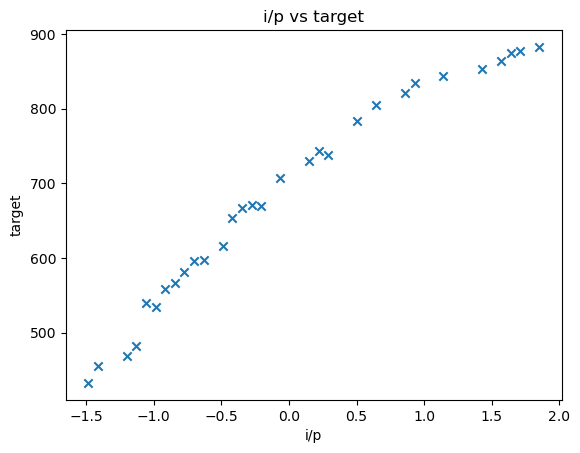

In [30]:
plt.scatter(x_train_scaled, y_train, marker='x')
plt.title("i/p vs target")
plt.xlabel('i/p')
plt.ylabel('target')
plt.show()

# train the model

In [31]:
# initilaize class
linear_model = LinearRegression()

# train the model
linear_model.fit(x_train_scaled, y_train)

LinearRegression()

In [35]:
# feeding the scaled data and get prediction
y_pred = linear_model.predict(x_train_scaled)

# mse
print(f'training MSE : {mean_squared_error(y_train, y_pred)}')

training MSE : 812.3874838506625


In [36]:
# scale the cv set using transform
x_cv_scaled = scaler.transform(x_cv)

y_pred = linear_model.predict(x_cv_scaled)

print(f'cv MSE : {mean_squared_error(y_cv, y_pred)}')

cv MSE : 1103.5578053904433


In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

# Sample data
X = np.random.random((1000, 10))  # 1000 rows with 10 features
y = np.random.random(1000)  # Target variable

# Create a linear regression model
model = LinearRegression()

# Perform cross-validation with 5 folds using mean squared error (MSE) as the scoring metric
mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
mse_scores = -mse_scores

# Print the MSE scores for each fold
print("MSE scores for each fold:", mse_scores)

# Calculate the average MSE across all folds
average_mse = np.mean(mse_scores)
print("Average MSE:", average_mse)


MSE scores for each fold: [0.08192486 0.08968937 0.08485073 0.08112866 0.07739368]
Average MSE: 0.08299746016023049


In [47]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

In [51]:
mse_scores = cross_val_score(model, X_scale, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -mse_scores
print("MSE scores for each fold:", mse_scores)
average_mse = np.mean(mse_scores)
print("Average MSE:", average_mse)


MSE scores for each fold: [0.08192486 0.08968937 0.08485073 0.08112866 0.07739368]
Average MSE: 0.0829974601602305
